In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("D:\Downloads\Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [6]:
df["Embarked"].unique() #SouthHamptons #Cherbourge #Queenstown

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df[df['Fare']==53.1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1,E8,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1,D30,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1,E8,S


In [8]:
df['Cabin']= df['Cabin'].fillna('LD') #filling the NaN with LD i.e. Lower Deck

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,LD,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,LD,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,LD,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,LD,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,LD,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df[df['Fare']<=10]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,LD,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,LD,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,LD,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,LD,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,LD,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,LD,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,LD,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,LD,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,LD,S


In [11]:
df[(df['Survived']==1) & (df['Fare']<=10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,LD,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,LD,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,LD,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,LD,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,LD,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,LD,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,LD,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,LD,Q
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,LD,S



Survived Counts:
0    549
1    342
Name: Survived, dtype: int64


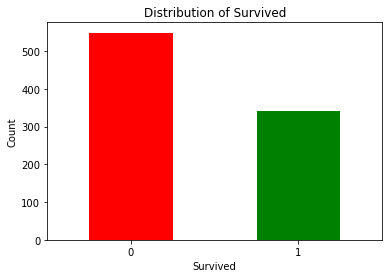

In [12]:
survived_counts = df['Survived'].value_counts()
print("\nSurvived Counts:")
print(survived_counts)

survived_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

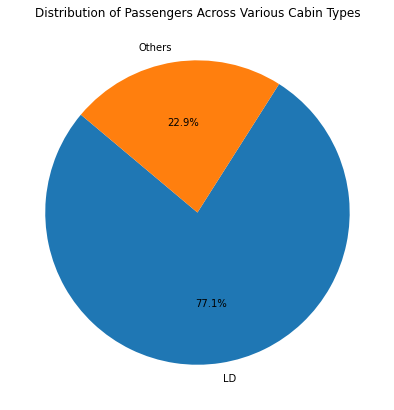

In [13]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Group less frequent cabin types into 'Other'
cabin_counts = df['Cabin'].value_counts()
threshold =5  # Set the threshold for grouping
cabin_counts_grouped = cabin_counts[cabin_counts >= threshold]
cabin_counts_grouped['Others'] = cabin_counts[cabin_counts < threshold].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(cabin_counts_grouped, labels=cabin_counts_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers Across Various Cabin Types')
plt.show()

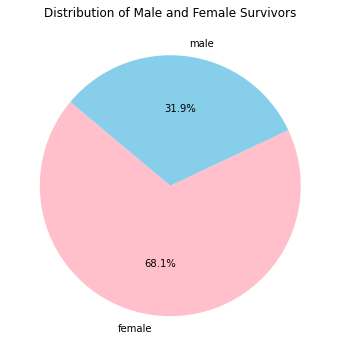

In [14]:
##To see the survival ratio on the basis of gender 

# Filter the dataset to include only survivors
survivors = df[df['Survived'] == 1]

# Count the number of male and female survivors
sex_counts = survivors['Sex'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Distribution of Male and Female Survivors')
plt.show()

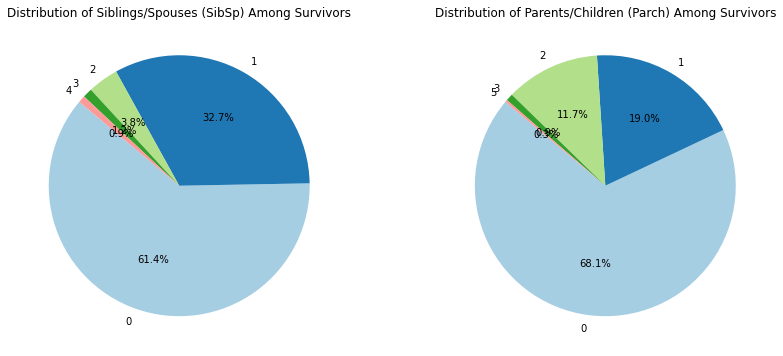

In [15]:
##To see if number of people you are travelling with affects your survival chances


# Filter the dataset to include only survivors
survivors = df[df['Survived'] == 1]

# Count the number of unique values in SibSp and Parch among the survivors
sibsp_counts = survivors['SibSp'].value_counts()
parch_counts = survivors['Parch'].value_counts()

# Plotting the pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for SibSp
axes[0].pie(sibsp_counts, labels=sibsp_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribution of Siblings/Spouses (SibSp) Among Survivors')

# Pie chart for Parch
axes[1].pie(parch_counts, labels=parch_counts.index,autopct='%1.1f%%',  startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Distribution of Parents/Children (Parch) Among Survivors')

plt.show()

In [16]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])
df = df.dropna(subset=['Embarked'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Split the data into features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7696629213483146
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178

Confusion Matrix:
[[85 24]
 [17 52]]
